# Using MLP (Multi Layer Perceptron)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
dataFrame = pd.read_excel("dataset/ENB2012_data.xlsx")
 
dataFrame.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Change Column Variable

In [3]:
dataFrame.rename(columns={
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution',
    'Y1': 'Heating Load',
    'Y2': 'Cooling Load'
    }, inplace=True)

dataFrame.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Checking Missing and Duplicate Value

In [4]:
# Check for missing values
miss = dataFrame.isnull().sum()

# Check for duplicates
duplicates = dataFrame.duplicated().sum()
print(f"Missing values:\n{miss}\n")
print(f"Duplicates: {duplicates}\n")

Missing values:
Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

Duplicates: 0



## Gausah dipahami yang ini kalo temen-temen gapaham

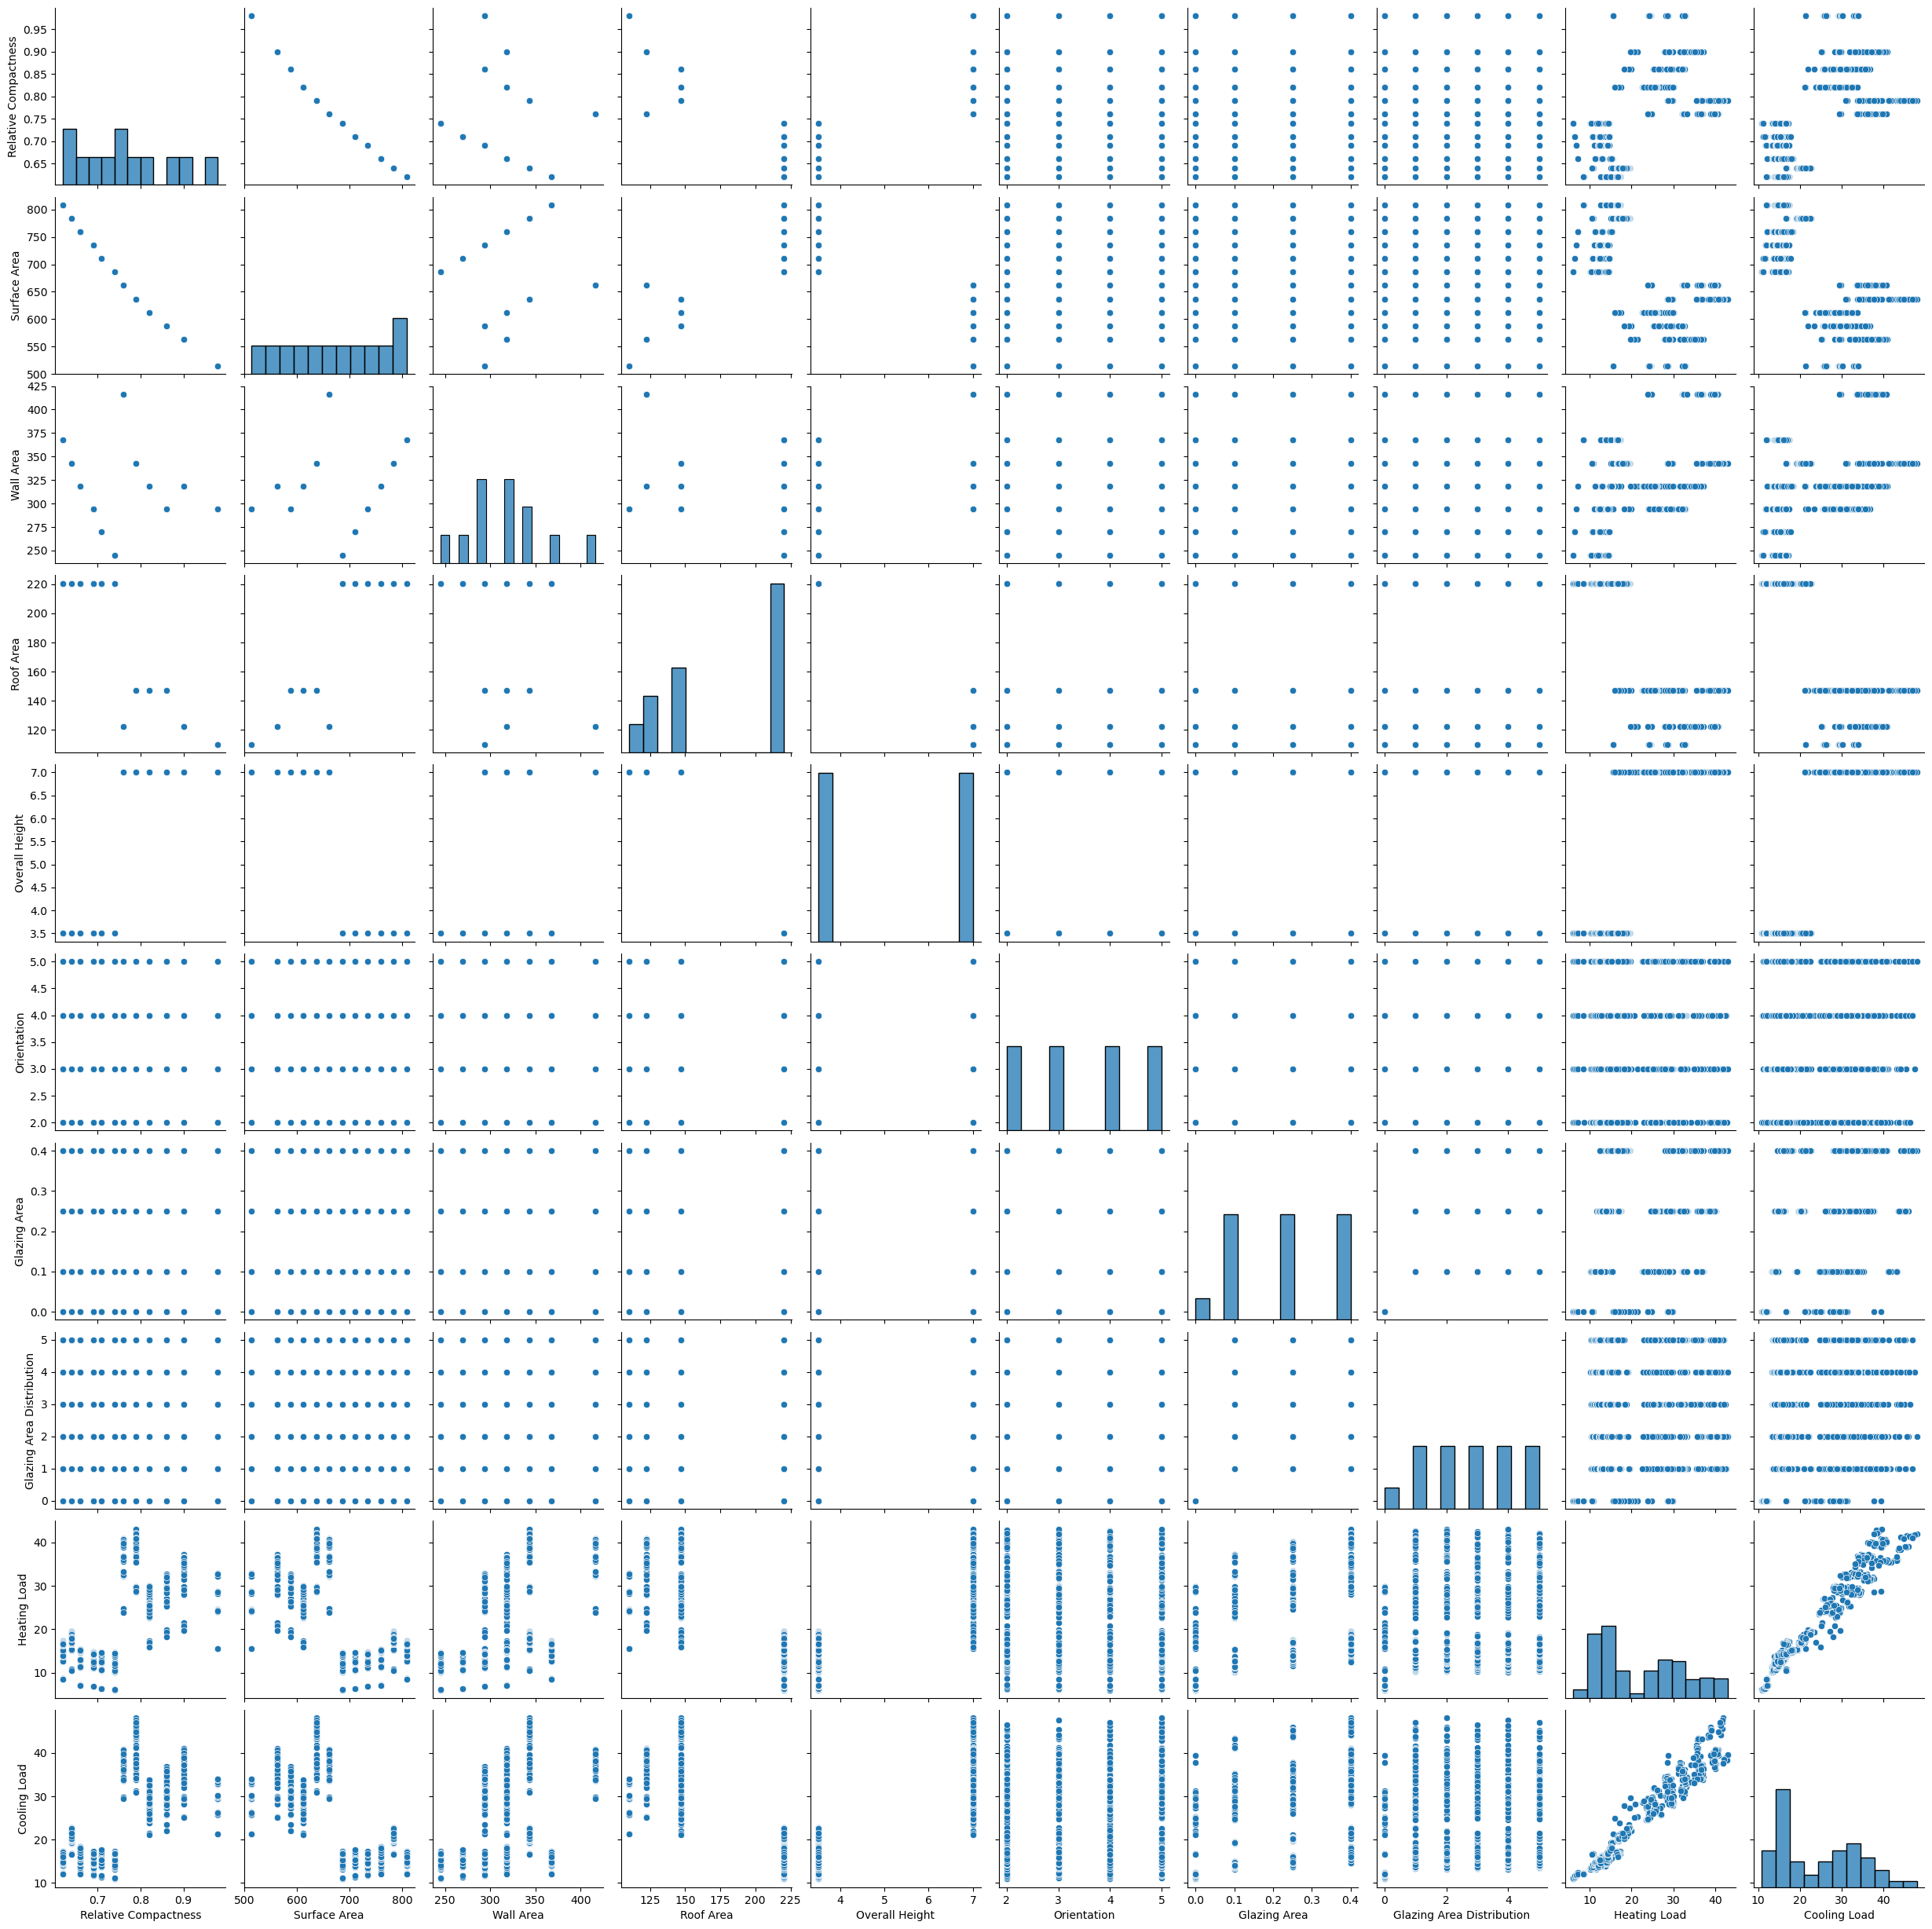

In [5]:
# Check for outliers
def outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound
outliers = {}
for col in dataFrame.columns:
    if dataFrame[col].dtype != 'object':
        lower_bound, upper_bound = outliers_iqr(dataFrame[col])
        outliers[col] = ((dataFrame[col] < lower_bound) | (dataFrame[col] > upper_bound)).sum()
# Visualize the data
sns.pairplot(dataFrame)
plt.show()

## Describe DataFrame

In [6]:
dataFrame.describe().round(2)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,0.76,671.71,318.50,176.60,5.25,3.50,0.23,2.81,22.31,24.59
std,0.11,88.09,43.63,45.17,1.75,1.12,0.13,1.55,10.09,9.51
min,0.62,514.50,245.00,110.25,3.50,2.00,0.00,0.00,6.01,10.90
25%,0.68,606.38,294.00,140.88,3.50,2.75,0.10,1.75,12.99,15.62
50%,0.75,673.75,318.50,183.75,5.25,3.50,0.25,3.00,18.95,22.08
75%,0.83,741.12,343.00,220.50,7.00,4.25,0.40,4.00,31.67,33.13
max,0.98,808.50,416.50,220.50,7.00,5.00,0.40,5.00,43.10,48.03


## Look Correlation

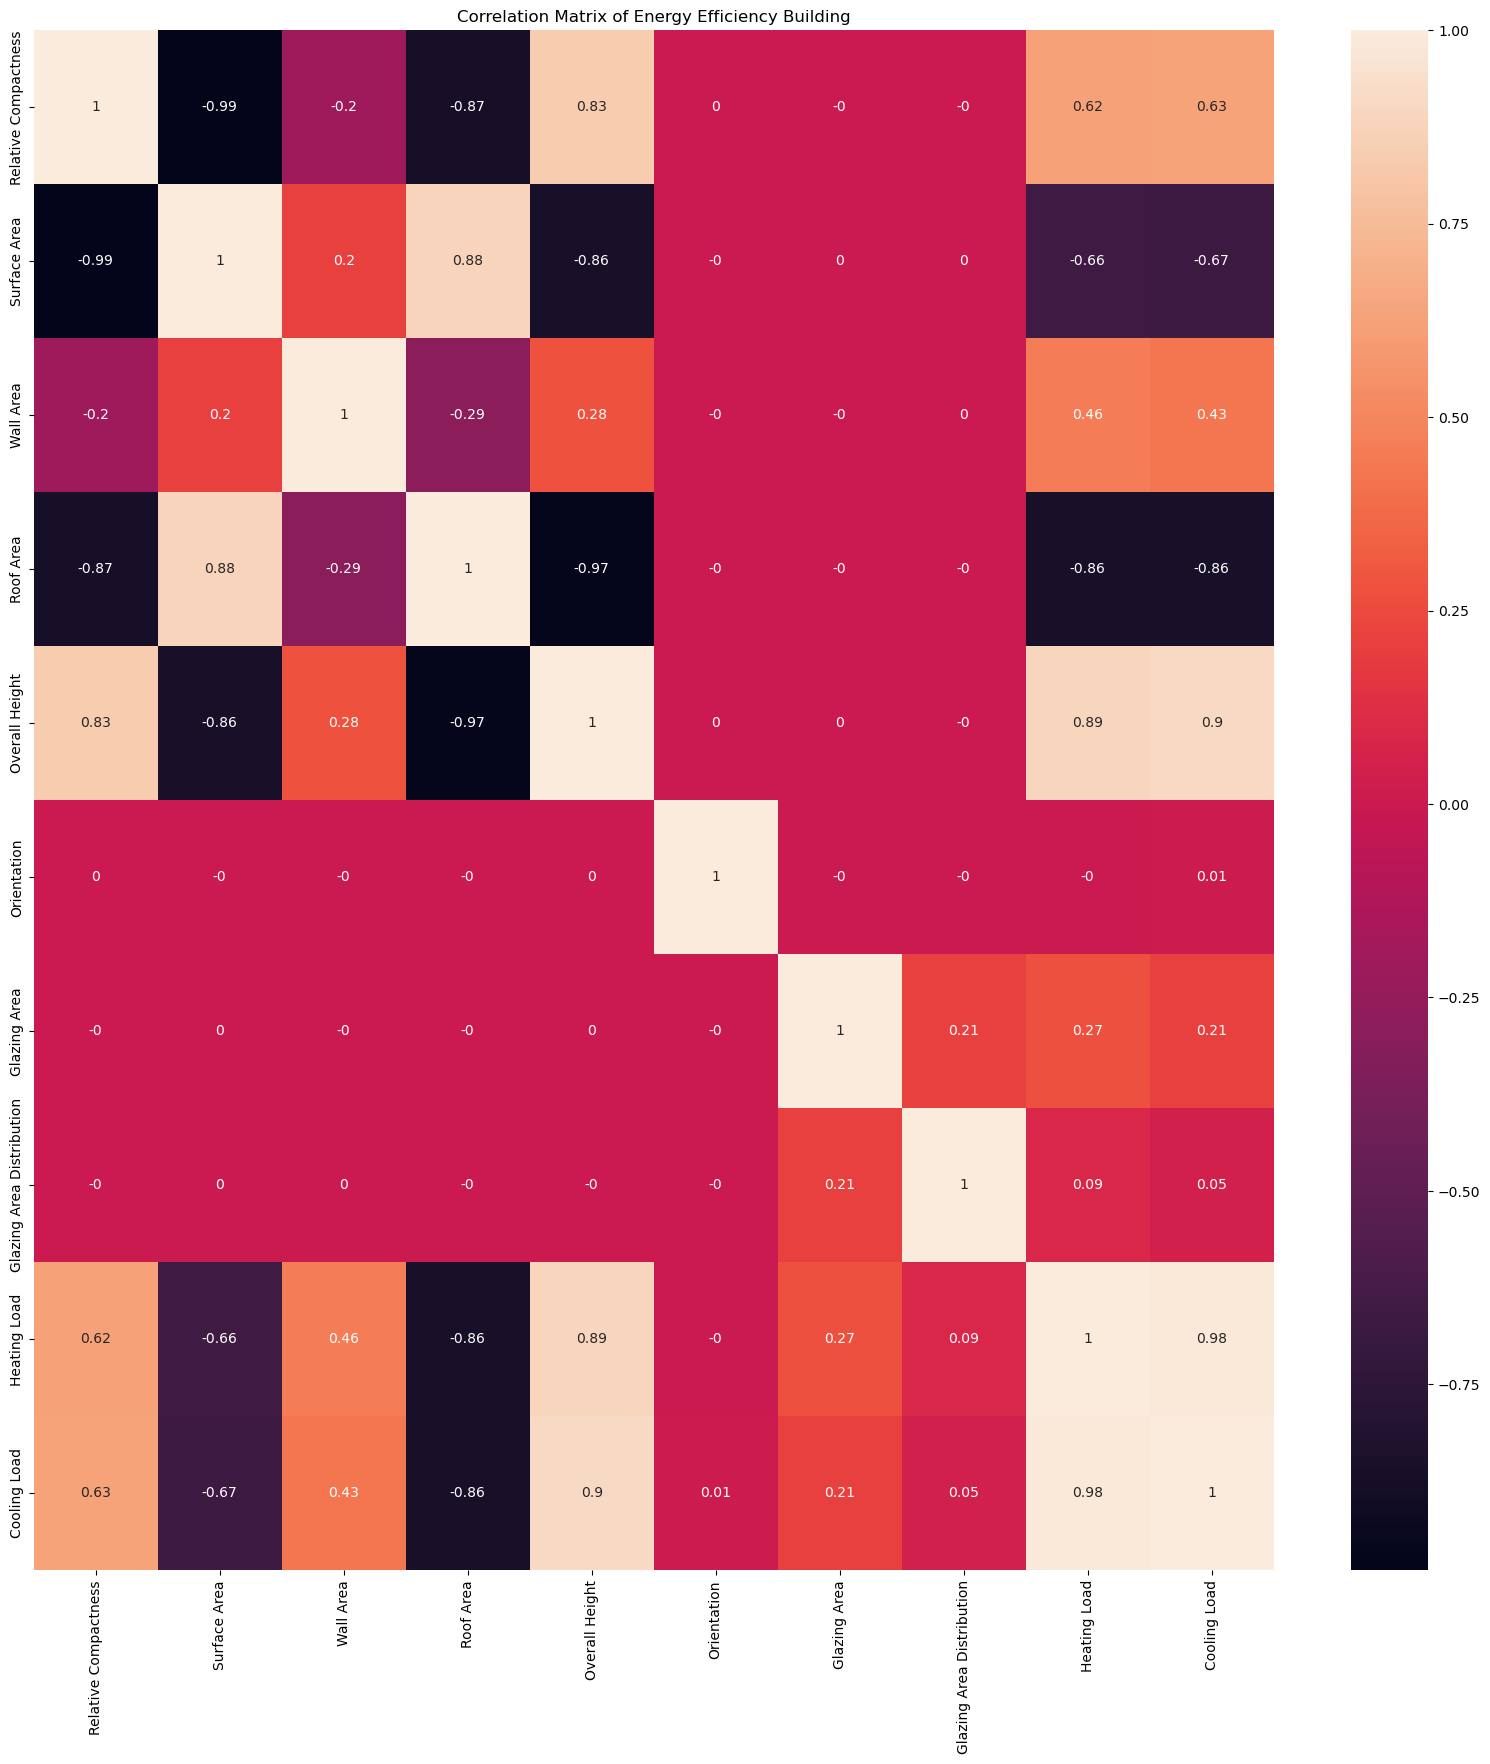

In [7]:
# Correlation matrix
plt.figure(figsize=(20, 20))
corr_matrix = dataFrame.corr().round(2)
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of Energy Efficiency Building')
plt.show()

## Splitting Data no Library

In [8]:
# Splitting data manually
np.random.seed(42)
indices = np.random.permutation(len(dataFrame))
train_split = int(0.8 * len(dataFrame))
train_indices = indices[:train_split]
test_indices = indices[train_split:]

X = dataFrame.drop(columns=['Orientation', 'Heating Load', 'Cooling Load']).values
y = dataFrame[['Heating Load', 'Cooling Load']].values

X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

## See dimensions of Data train and Data Test

In [9]:
X_train.shape, y_train.shape
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (614, 7)
y_train shape: (614, 2)
X_test shape: (154, 7)
y_test shape: (154, 2)


## Normalize with Standardization

In [10]:
mean, std = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

## Metrics formula

In [11]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


## NN with MLPRegressor

to determine the best hyperparameter tuning we use gridSearchCV(cv=5)

In [ ]:
## Neural Network
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

## Define the parameter grid for MLP
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,), (40,), (50,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.001, 0.01, 0.1],
    'max_iter': [50, 100, 200, 500, 1000],
    'learning_rate': ['constant', 'adaptive']
}

## to find the best parameters for the MLP
mlp = MLPRegressor(random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_parameters_mlp = grid_search.best_params_
best_score_mlp = grid_search.best_score_
print(f"Best parameters for MLP: {best_parameters_mlp}")
print(f"Best score for MLP: {best_score_mlp}")

/home/wildanaziz/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/wildanaziz/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/wildanaziz/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/wildanaziz/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/wildanaziz/anacond

Best parameters for MLP: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'}
Best score for MLP: -1.1783972806050174


## fit and apply best parameters

In [ ]:
mlp_tuning = MLPRegressor(**best_parameters_mlp, random_state=42)
mlp_tuning.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=0.001, hidden_layer_sizes=(20,),
             max_iter=1000, random_state=42, solver='sgd')

## results of each metric

In [15]:
from sklearn.metrics import r2_score
train_mlp_rmse = root_mean_squared_error(y_train, mlp_tuning.predict(X_train))
test_mlp_rmse = root_mean_squared_error(y_test, mlp_tuning.predict(X_test))
train_mlp_r2 = r2_score(y_train, mlp_tuning.predict(X_train))
test_mlp_r2 = r2_score(y_test, mlp_tuning.predict(X_test))
train_mlp_mae = mean_absolute_error(y_train, mlp_tuning.predict(X_train))
test_mlp_mae = mean_absolute_error(y_test, mlp_tuning.predict(X_test))
train_mlp_mse = mean_squared_error(y_train, mlp_tuning.predict(X_train))
test_mlp_mse = mean_squared_error(y_test, mlp_tuning.predict(X_test))
print(f"Train RMSE for MLP: {train_mlp_rmse}")
print(f"Test RMSE for MLP: {test_mlp_rmse}")
print(f"Train R2 for MLP: {train_mlp_r2}")
print(f"Test R2 for MLP: {test_mlp_r2}")
print(f"Train MAE for MLP: {train_mlp_mae}")
print(f"Test MAE for MLP: {test_mlp_mae}")
print(f"Train MSE for MLP: {train_mlp_mse}")
print(f"Test MSE for MLP: {test_mlp_mse}")

Train RMSE for MLP: 1.2364098745073093
Test RMSE for MLP: 1.0746601305060683
Train R2 for MLP: 0.9836250322956384
Test R2 for MLP: 0.9859788288092775
Train MAE for MLP: 0.7661688358095818
Test MAE for MLP: 0.6779529820574227
Train MSE for MLP: 1.5287093777791805
Test MSE for MLP: 1.1548943960993199


## plot metric results

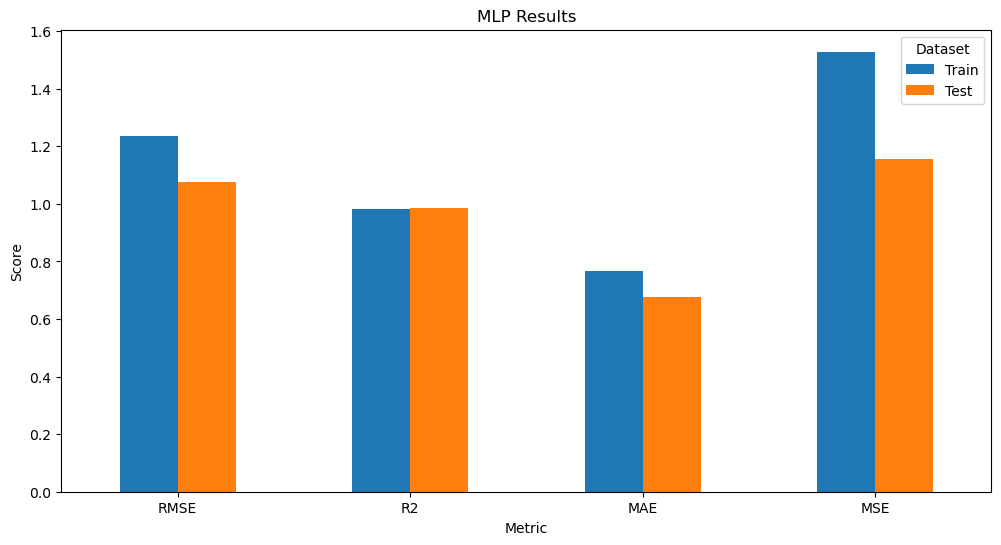

In [49]:
results_mlp = pd.DataFrame({
    'Metric': ['RMSE', 'R2', 'MAE', 'MSE'],
    'Train': [train_mlp_rmse, train_mlp_r2, train_mlp_mae, train_mlp_mse],
    'Test': [test_mlp_rmse, test_mlp_r2, test_mlp_mae, test_mlp_mse],

})

results_mlp.plot(x='Metric', kind='bar', figsize=(12, 6), title='MLP Results')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Dataset')
plt.show()

## save model to pickle

In [16]:
import joblib

# save the model
joblib.dump(mlp_tuning, 'mlp_model.pkl')

# save the scaler
joblib.dump((mean, std), 'mlp_scaler.pkl')

['mlp_scaler.pkl']

## load model and test prediction

In [52]:
## Predictions

#load the model
mlp_model = joblib.load('mlp_model.pkl')

predictions = X_test[:10]
pred_dict = {
    'Heating Load True': y_test[:10, 0],
    'Cooling Load True': y_test[:10, 1],
    'MLP Predict Heating Load': mlp_model.predict(predictions)[:10, 0],
    'MLP Predict Cooling Load': mlp_model.predict(predictions)[:10, 1]
}

pred_df = pd.DataFrame(pred_dict)
print(pred_df)

   Heating Load True  Cooling Load True  MLP Predict Heating Load  \
0              28.40              34.52                 29.252078   
1              11.67              14.58                 12.176030   
2              14.96              17.64                 14.959542   
3              15.09              18.36                 15.065465   
4              40.40              39.67                 39.763093   
5              14.33              16.99                 14.453632   
6              13.78              16.60                 14.254826   
7              14.51              17.10                 14.788036   
8              32.71              33.13                 32.468403   
9              11.69              13.72                 11.038098   

   MLP Predict Cooling Load  
0                 31.391170  
1                 14.730702  
2                 17.694240  
3                 17.903450  
4                 39.048486  
5                 16.728022  
6                 16.744098  
